# 2.3 Complex Machine Learning Models and Keras Part 2 - 2. München Results (ALL years)

### Table of Conttents    
1.Import Libraries & Dataset  
2.Clean & Wrangle  
3.Shaping Data  
4.Spliting Data  
5.Training a Random Forest Classifier  
6.Feature Importance Analysis  
7.Insights

### 1.Import Libraries & Dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score

In [3]:
# Create a path for the import of dataset
path = r'C:\Users\supri\Desktop\Supriya\DataAnalysis\Project\Data Immersion\MachineLearningWithPython\ClimateWins\Data Sets'

In [4]:
# Import weather dataset

climate = pd.read_csv(os.path.join(path, 'unscaled_cleaned_date.csv'))

In [5]:
climate.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,KASSEL_cloud_cover,MUNCHENB_pressue,STOCKHOLM_humidity
0,19600101,1,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,...,1.0003,0.45,0.34,4.7,8.5,6.0,10.9,8,1.0304,0.98
1,19600102,1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,...,1.0007,0.25,0.84,0.7,8.9,5.6,12.1,6,1.0292,0.62
2,19600103,1,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,...,1.0096,0.17,0.08,0.1,10.5,8.1,12.9,8,1.0320,0.69
3,19600104,1,3,0.92,1.018,0.58,0.00,4.1,6.3,3.8,...,1.0184,0.13,0.98,0.0,7.4,7.3,10.6,6,1.0443,0.98
4,19600105,1,6,0.95,1.018,0.65,0.14,5.4,3.0,-0.7,...,1.0328,0.46,0.00,5.7,5.7,3.0,8.4,7,1.0430,0.96


In [6]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22950 entries, 0 to 22949
Columns: 137 entries, DATE to STOCKHOLM_humidity
dtypes: float64(120), int64(17)
memory usage: 24.0 MB


In [7]:
climate.shape

(22950, 137)

In [8]:
# Import the 'Pleasant weather' dataset

pleasantweather = pd.read_csv(os.path.join(path,  'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [9]:
pleasantweather.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
pleasantweather.shape

(22950, 16)

### 2.Clean & Wrangle

In [11]:
climate.isnull().sum()

DATE                  0
MONTH                 0
BASEL_cloud_cover     0
BASEL_humidity        0
BASEL_pressure        0
                     ..
VALENTIA_temp_min     0
VALENTIA_temp_max     0
KASSEL_cloud_cover    0
MUNCHENB_pressue      0
STOCKHOLM_humidity    0
Length: 137, dtype: int64

In [12]:
pleasantweather.isnull().sum()

DATE                           0
BASEL_pleasant_weather         0
BELGRADE_pleasant_weather      0
BUDAPEST_pleasant_weather      0
DEBILT_pleasant_weather        0
DUSSELDORF_pleasant_weather    0
HEATHROW_pleasant_weather      0
KASSEL_pleasant_weather        0
LJUBLJANA_pleasant_weather     0
MAASTRICHT_pleasant_weather    0
MADRID_pleasant_weather        0
MUNCHENB_pleasant_weather      0
OSLO_pleasant_weather          0
SONNBLICK_pleasant_weather     0
STOCKHOLM_pleasant_weather     0
VALENTIA_pleasant_weather      0
dtype: int64

In [13]:
# Filter for columns related to 'München' station
München_station = [x for x in climate.columns if 'MUNCHENB' in x.upper()]

# Create a new DataFrame for München station data
München_df = climate[München_station]

München_df

,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,MUNCHENB_pressue
0,5,0.67,0.20,0.10,0.0,6.9,1.1,10.4,1.0304
1,6,0.72,0.61,0.30,5.1,6.2,4.2,10.2,1.0292
2,6,0.91,0.20,0.30,0.0,5.8,4.0,8.0,1.0320
3,6,0.90,0.20,0.01,0.0,3.9,3.2,5.4,1.0443
4,5,0.85,0.65,0.96,5.6,1.8,-3.0,6.0,1.0430
...,...,...,...,...,...,...,...,...,...
22945,2,0.76,1.37,0.26,9.7,14.3,8.3,22.2,1.0263
22946,6,0.70,1.37,0.26,7.7,16.1,8.9,26.1,1.0263
22947,7,0.64,1.37,0.26,6.8,17.4,11.2,26.2,1.0263
22948,6,0.75,1.37,0.26,8.3,14.5,9.2,23.5,1.0263


In [14]:
# Reduce pleasantweather dataset to München's data only

pleasantweather_München = pleasantweather['MUNCHENB_pleasant_weather']

pleasantweather_München

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: MUNCHENB_pleasant_weather, Length: 22950, dtype: int64

In [15]:
#Check the shape

München_df.shape 

(22950, 9)

In [16]:
#Check the shape

pleasantweather_München.shape

(22950,)

### 3.Shaping Data

In [17]:
# Define features and target for München

X_München = München_df  # München weather features
y_München = pleasantweather['MUNCHENB_pleasant_weather']  # München target labels

# Convert to NumPy arrays

X = np.array(X_München)
y = np.array(y_München) # as previously described - these tools expect the data to be in a clean, fast format - "NumPy arrays".

In [18]:
X.shape

(22950, 9)

In [19]:
y.shape

(22950,)

##### Data is now in the perfect format to be used in a machine learning model!

##### Next Step:
Train a Random Forest model to learn from this data  
Plot one or two of the trees to visually explain decisions  
Identify which weather features or stations are most influential

### 4.Spliting Data

In [20]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [21]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


### 5.Training a Random Forest Classifier

In [22]:
# Initialize the Random Forest model
# This creates 100 decision trees and uses them together to make predictions
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Check how accurate the model is
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy on Test Set:", round(accuracy * 100, 2), "%")

Random Forest Accuracy on Test Set: 100.0 %


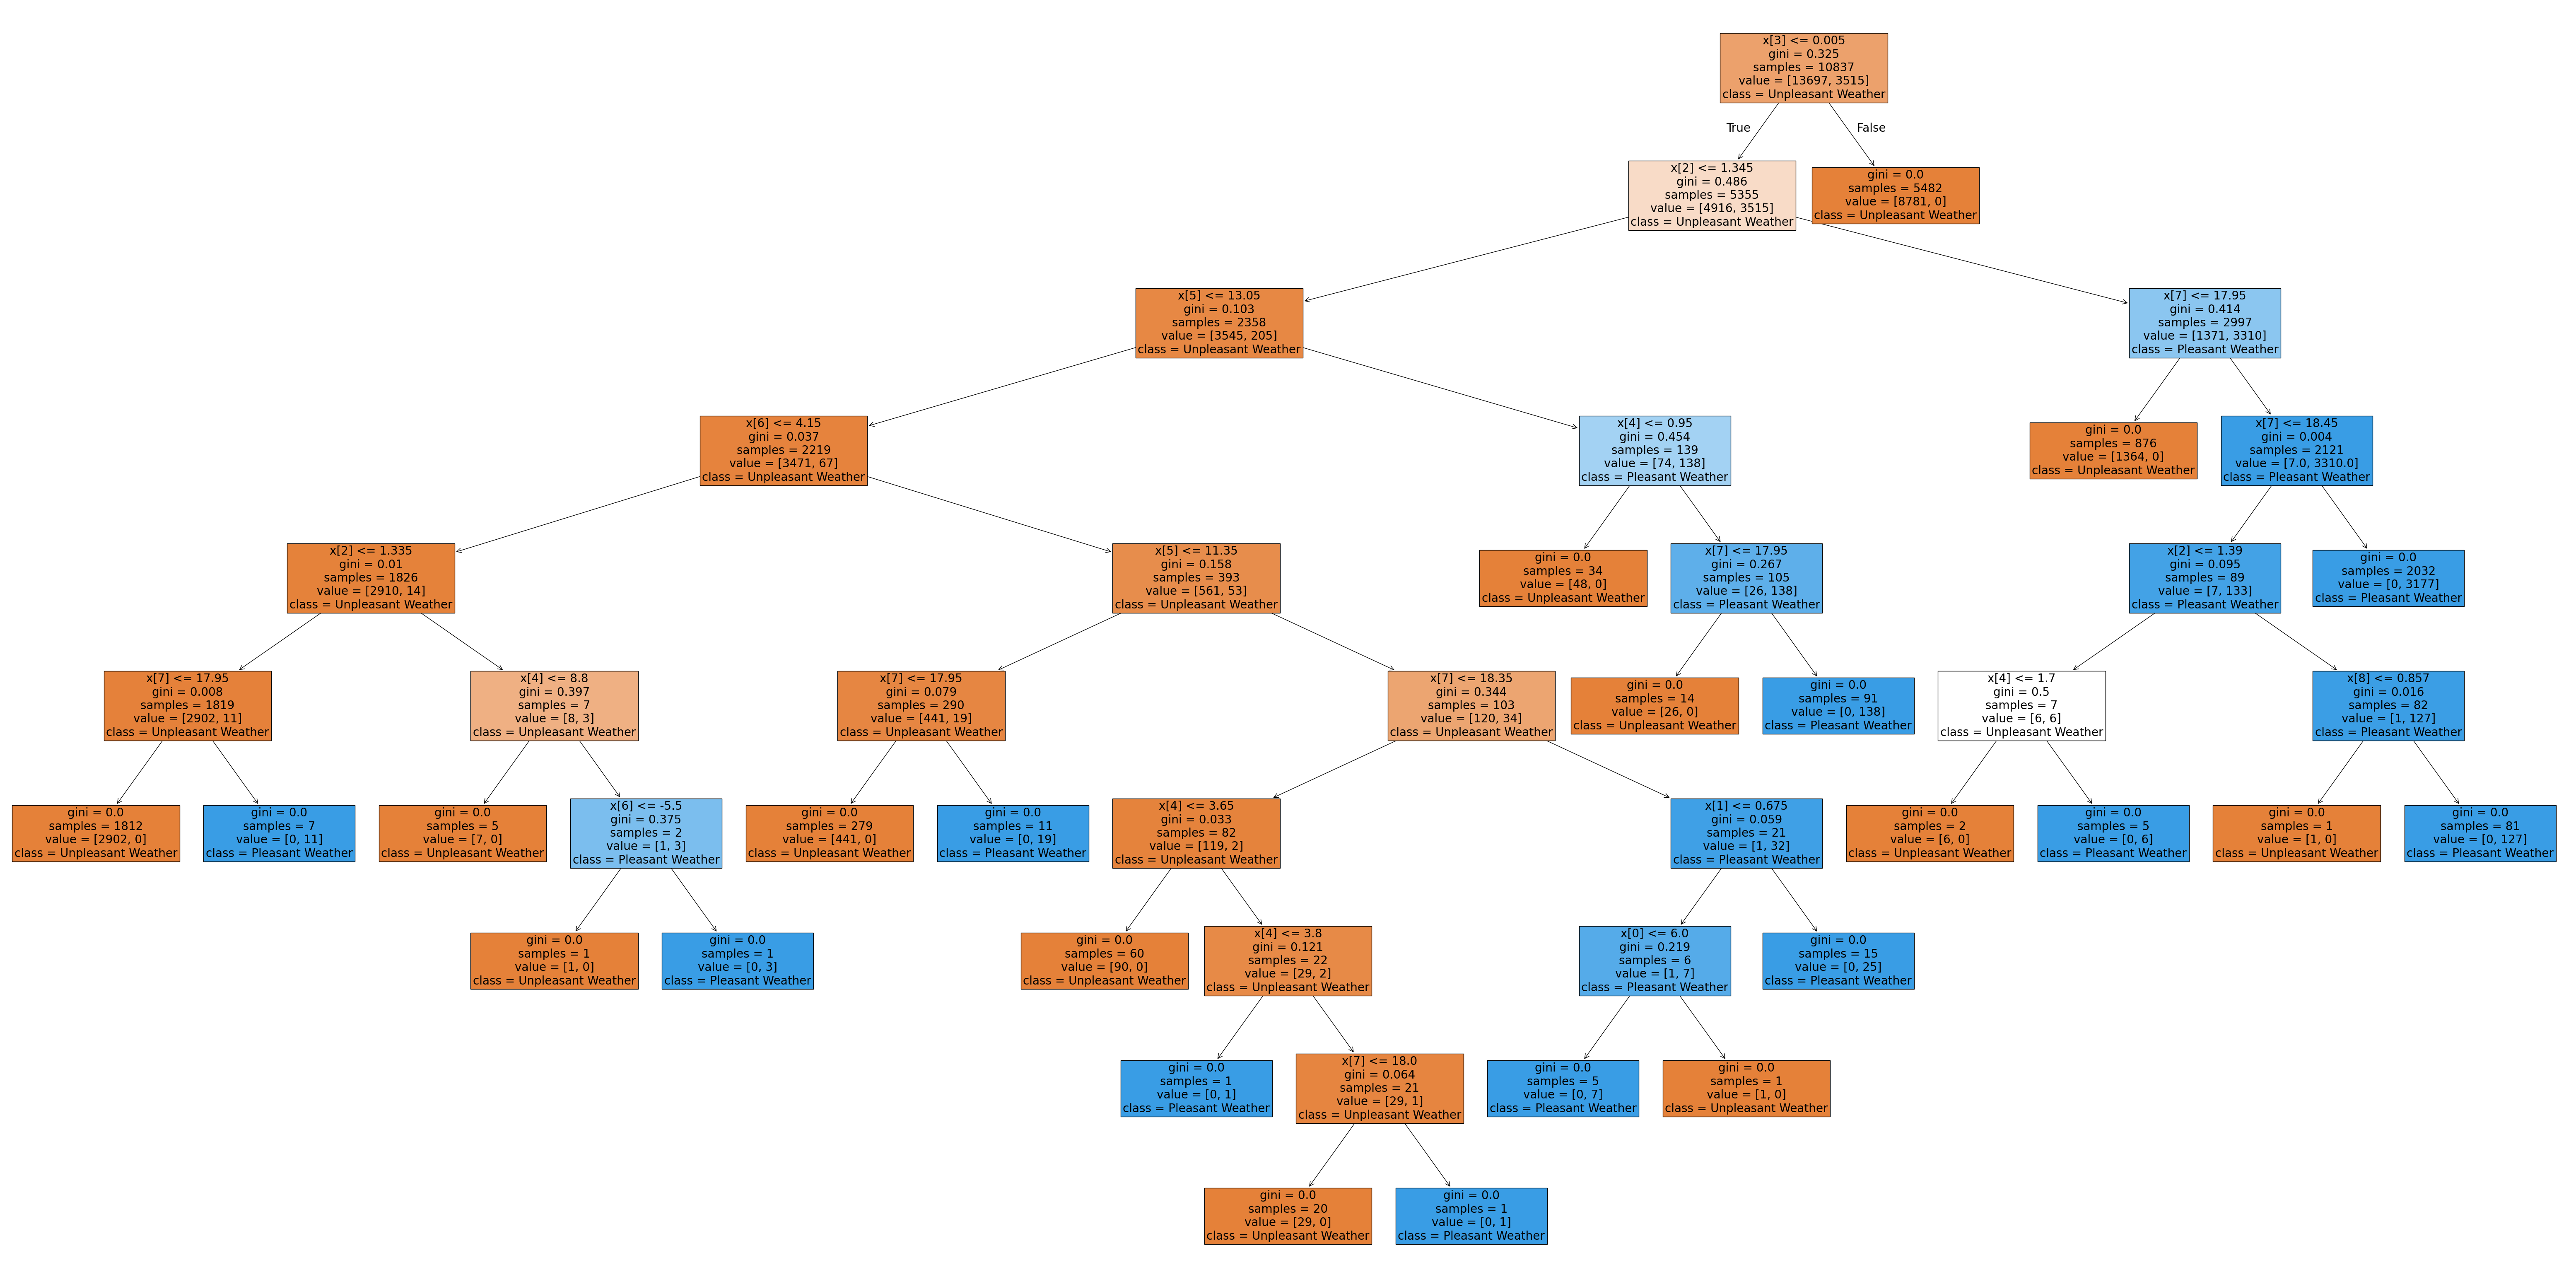

In [23]:
# Define class names for readability
class_names = ['Unpleasant Weather', 'Pleasant Weather']

# Plot the tree
fig = plt.figure(figsize=(80, 40))
plot_tree(clf.estimators_[15], 
          filled=True, 
          fontsize=20,
          feature_names=None,  # You can add your feature names here if you'd like
          class_names=class_names);  # Adds class labels at the leaves

### 6.Feature Importance Analysis

In [24]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape) # Should print: (9,)
newarray # This shows the raw importance values

(9,)


array([0.02855467, 0.00659025, 0.07539602, 0.38356351, 0.09148269,
       0.08714764, 0.01506576, 0.30078152, 0.01141794])

In [25]:
# Clean feature names from Maastricht columns

München_features = [feature.replace('MUNCHENB_', '') for feature in München_station]
München_features

['cloud_cover',
 'humidity',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max',
 'pressue']

In [26]:
# Create Series for feature importance

important = pd.Series(newarray, index=München_features).sort_values(ascending=False)
important

precipitation       0.383564
temp_max            0.300782
sunshine            0.091483
temp_mean           0.087148
global_radiation    0.075396
cloud_cover         0.028555
temp_min            0.015066
pressue             0.011418
humidity            0.006590
dtype: float64

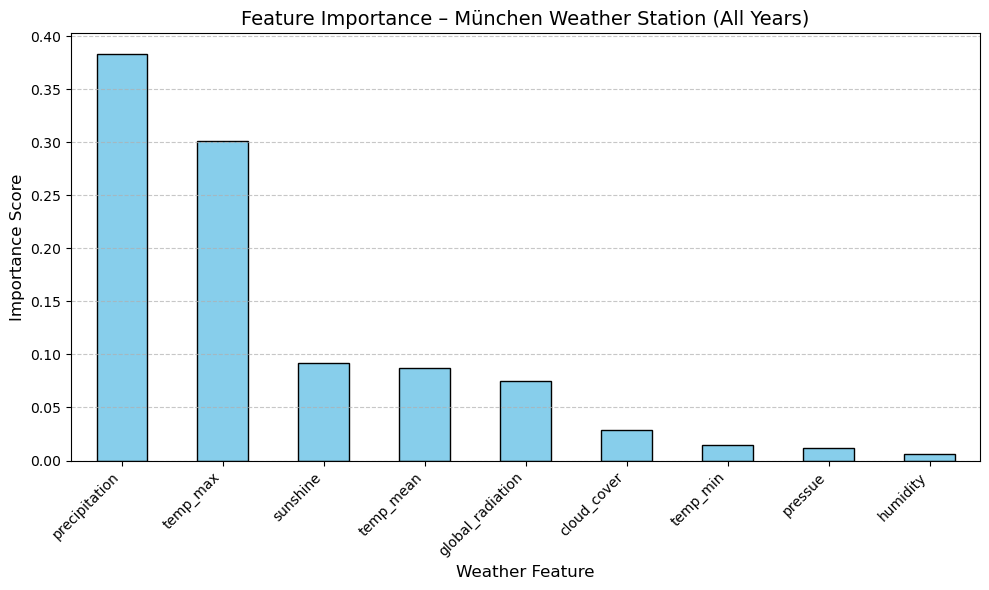

In [27]:
# Plot feature importance

plt.figure(figsize=(10, 6))
important.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Feature Importance – München Weather Station (All Years)', fontsize=14)
plt.xlabel('Weather Feature', fontsize=12)
plt.ylabel('Importance Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### 07 Insights

The Random Forest model trained on München’s weather data achieved 100% accuracy in predicting whether a day was pleasant or not.
-Precipitation was the most influential predictor — lower rainfall or snowfall strongly correlated with pleasant weather.  
-Maximum temperature (temp_max) closely followed, with warmer days increasing the likelihood of being pleasant.  
-Sunshine, mean temperature, and global radiation (solar energy) also contributed significantly to the model’s predictions.  

On the other hand, cloud cover, minimum temperature, air pressure, and humidity were found to have relatively low importance in classifying pleasant days.